In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sb
# Import datasets for use
from sklearn import datasets

In [15]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

'setosa'

In [19]:
iris.target_names[iris.target]

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [20]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['class'] = iris.target_names[iris.target]
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [21]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


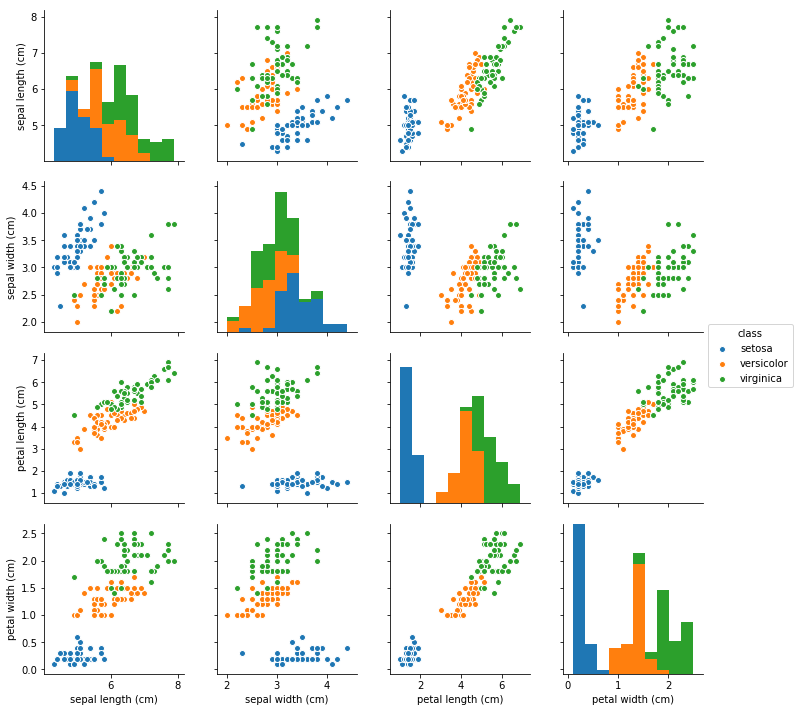

In [22]:
sb.pairplot(iris_df, hue='class')

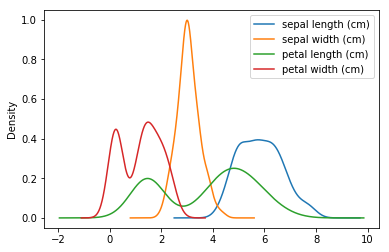

In [23]:
# Dataset density plot
iris_df.plot(kind='kde')

In [24]:
# Import confusion matrix functionality
from sklearn.metrics import confusion_matrix as sk_confusion_matrix

# Create and format a confusion matrix
def conf_matrix(y_test, y_predict):

    # Create the raw confusion matrix
    conf = sk_confusion_matrix(y_test, y_predict)

    # Format the confusion matrix nicely
    conf = pd.DataFrame(data=conf)
    conf.columns.name = 'Predicted label'
    conf.index.name = 'Actual label'

    # Return the confusion matrix
    return conf

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1)

E:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [62]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Logistic Regression

In [77]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(X_train_scaled, y_train)

# score
print(logistic.score(X_train_scaled, y_train))
print(logistic.score(X_test_scaled, y_test))

0.809523809524
0.711111111111


In [80]:
# the confusion matrix
y_predict = logistic.predict(X_test_scaled)
conf = conf_matrix(y_test, y_predict)
accuracy = (y_predict == y_test).mean()
print('accuracy: %.2f' % accuracy)
conf

accuracy: 0.71


Predicted label,0,1,2
Actual label,,,
0,14,0,0
1,0,5,13
2,0,0,13


In [81]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

# score
print(logistic.score(X_train, y_train))
print(logistic.score(X_test, y_test))
y_predict = logistic.predict(X_test)
conf = conf_matrix(y_test, y_predict)
accuracy = (y_predict == y_test).mean()
print('accuracy: %.2f' % accuracy)
conf

0.952380952381
0.888888888889
accuracy: 0.89


Predicted label,0,1,2
Actual label,,,
0,14,0,0
1,0,13,5
2,0,0,13


### Interestingly, the accuracy of scaled data is lower than original data. 

## Decision tree 

The decesion tree algorithm doesn't require standardization.

In [85]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(X_train, y_train)
print(decision_tree_classifier.score(X_train, y_train))
print(decision_tree_classifier.score(X_test, y_test))

y_predict = decision_tree_classifier.predict(X_test)
conf = conf_matrix(y_test, y_predict)
accuracy = (y_predict == y_test).mean()
print('accuracy: %.2f' % accuracy)
conf

1.0
0.955555555556
accuracy: 0.96


Predicted label,0,1,2
Actual label,,,
0,14,0,0
1,0,17,1
2,0,1,12


E:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


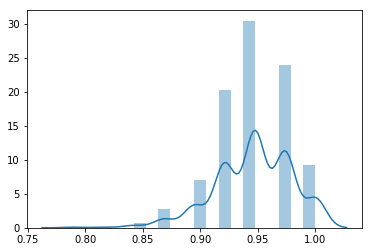

In [121]:
model_accuracies = []

for repetition in range(1000):
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(X, y, train_size=0.75)
    
    decision_tree_classifier = DecisionTreeClassifier()
    decision_tree_classifier.fit(training_inputs, training_classes)
    classifier_accuracy = decision_tree_classifier.score(testing_inputs, testing_classes)
    model_accuracies.append(classifier_accuracy)
    
sb.distplot(model_accuracies)

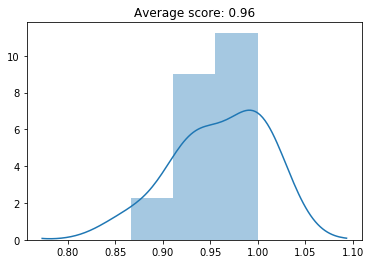

In [89]:
from sklearn.cross_validation import cross_val_score

decision_tree_classifier = DecisionTreeClassifier()

cv_scores = cross_val_score(decision_tree_classifier, X, y, cv=10)
sb.distplot(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

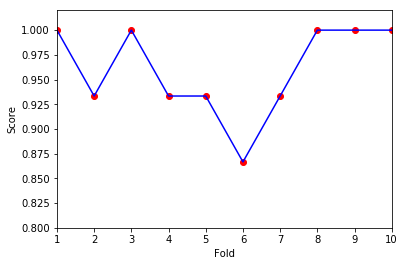

In [93]:
# Plot fold scores
folds = np.arange(1,11)

plt.xlabel('Fold')
plt.ylabel('Score')
plt.ylim([0.8,1.02])
plt.xlim([1.0,10.0])

plt.scatter(folds, cv_scores, color='red')
plt.plot(folds, cv_scores, color='blue')
plt.show()

## SVM

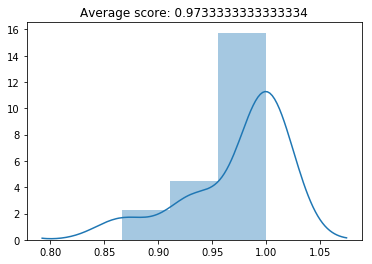

In [94]:
from sklearn import svm
from sklearn.cross_validation import cross_val_score

# Build the (linear) SVM model object
svm_clf = svm.SVC(kernel='linear', C=1)
cv_scores = cross_val_score(svm_clf, X, y, cv=10)
sb.distplot(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

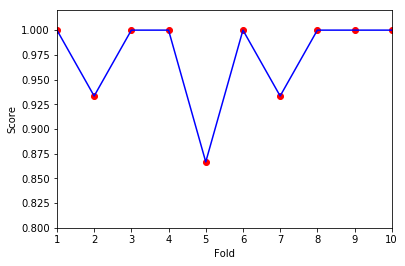

In [95]:
# Plot fold scores
folds = np.arange(1,11)

plt.xlabel('Fold')
plt.ylabel('Score')
plt.ylim([0.8,1.02])
plt.xlim([1.0,10.0])

plt.scatter(folds, cv_scores, color='red')
plt.plot(folds, cv_scores, color='blue')
plt.show()

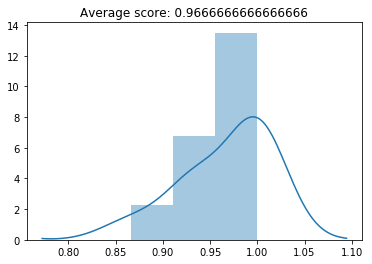

In [99]:
from sklearn.pipeline import make_pipeline
svm_clf = make_pipeline(MinMaxScaler(), svm.SVC(kernel='linear', C=1))
cv_scores = cross_val_score(svm_clf, X, y, cv=10)
sb.distplot(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

### The accuracy of scaled data is lower than original data. 

## Naive Bayes

In [101]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train_scaled, y_train)

print(nb.score(X_train_scaled, y_train))
print(nb.score(X_test_scaled, y_test))
y_predict = nb.predict(X_test_scaled)
conf = conf_matrix(y_test, y_predict)
accuracy = (y_predict == y_test).mean()
print('accuracy: %.2f' % accuracy)
conf

0.952380952381
0.933333333333
accuracy: 0.93


Predicted label,0,1,2
Actual label,,,
0,14,0,0
1,0,16,2
2,0,1,12


In [102]:
nb = GaussianNB()
nb.fit(X_train, y_train)

print(nb.score(X_train, y_train))
print(nb.score(X_test, y_test))
y_predict = nb.predict(X_test)
conf = conf_matrix(y_test, y_predict)
accuracy = (y_predict == y_test).mean()
print('accuracy: %.2f' % accuracy)
conf

0.952380952381
0.933333333333
accuracy: 0.93


Predicted label,0,1,2
Actual label,,,
0,14,0,0
1,0,16,2
2,0,1,12


## k-nearest Neighbors

In [103]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

print(knn.score(X_train_scaled, y_train))
print(knn.score(X_test_scaled, y_test))

y_predict = knn.predict(X_test_scaled)
conf = conf_matrix(y_test, y_predict)
accuracy = (y_predict == y_test).mean()
print('accuracy: %.2f' % accuracy)
conf

0.961904761905
0.955555555556
accuracy: 0.96


Predicted label,0,1,2
Actual label,,,
0,14,0,0
1,0,17,1
2,0,1,12


In [116]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))

y_predict = knn.predict(X_test)
conf = conf_matrix(y_test, y_predict)
accuracy = (y_predict == y_test).mean()
print('accuracy: %.2f' % accuracy)
conf

0.952380952381
0.977777777778
accuracy: 0.98


Predicted label,0,1,2
Actual label,,,
0,14,0,0
1,0,18,0
2,0,1,12


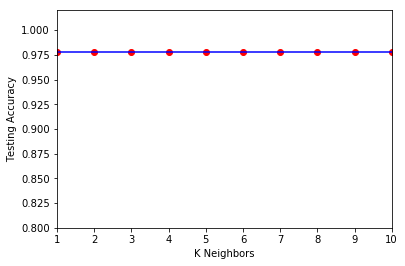

In [117]:
from sklearn import metrics
k_range = range(1, 11)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_predict))

# Plot results
plt.plot(k_range, scores, color='blue')
plt.scatter(k_range, scores, color='red')

plt.ylim([0.8,1.02])
plt.xlim([1.0,10.0])
plt.xlabel('K Neighbors')
plt.ylabel('Testing Accuracy')

plt.show()

## Random Forests

In [122]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

print(rf.score(X_train, y_train))
print(rf.score(X_test, y_test))

y_predict = rf.predict(X_test)
conf = conf_matrix(y_test, y_predict)
accuracy = (y_predict == y_test).mean()
print('accuracy: %.2f' % accuracy)
conf

1.0
0.955555555556
accuracy: 0.96


Predicted label,0,1,2
Actual label,,,
0,14,0,0
1,0,17,1
2,0,1,12


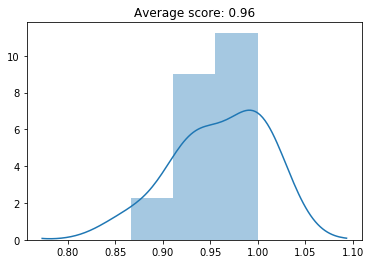

In [124]:
rf = RandomForestClassifier()

cv_scores = cross_val_score(rf, X, y, cv=10)
sb.distplot(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

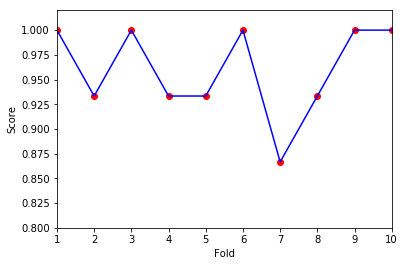

In [125]:
# Plot fold scores
folds = np.arange(1,11)

plt.xlabel('Fold')
plt.ylabel('Score')
plt.ylim([0.8,1.02])
plt.xlim([1.0,10.0])

plt.scatter(folds, cv_scores, color='red')
plt.plot(folds, cv_scores, color='blue')
plt.show()